## Nettoyage des données

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statistics

In [312]:
data = pd.read_csv("../CSV-Excels/dataframe_P4.csv")

In [313]:
data.shape

(3376, 46)

In [314]:
# Définition energy star score
# taking into account the building’s physical assets, operations, and occupant behavior.
# It is expressed on an easy-to-understand 1 to 100 scale, where the higher the score,
# the better the energy performance of the building.
# Building with energy star certified use less energy and cause fewer greenhouse gas emissions

In [315]:
data.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [316]:
data.describe(include='all').iloc[:,3:]

,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
count,3376,3376,3376,3376,3376,3360.000000,3376,3376.000000,3376,3376.000000,...,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3376,0.0,3376,32,3367.000000,3367.000000
unique,24,3362,3354,1,1,NaN,3268,NaN,19,NaN,...,NaN,NaN,NaN,NaN,2,NaN,4,2,NaN,NaN
top,Low-Rise Multifamily,Northgate Plaza,2600 SW Barton St,Seattle,WA,NaN,1625049001,NaN,DOWNTOWN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,Compliant,Low outlier,NaN,NaN
freq,987,3,4,3376,3376,NaN,8,NaN,573,NaN,...,NaN,NaN,NaN,NaN,3263,NaN,3211,23,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,98116.949107,NaN,4.439277,NaN,47.624033,...,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,NaN,NaN,NaN,119.723971,1.175916
std,NaN,NaN,NaN,NaN,NaN,18.615205,NaN,2.120625,NaN,0.047758,...,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,NaN,NaN,NaN,538.832227,1.821452
min,NaN,NaN,NaN,NaN,NaN,98006.000000,NaN,1.000000,NaN,47.499170,...,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,-0.800000,-0.020000
25%,NaN,NaN,NaN,NaN,NaN,98105.000000,NaN,3.000000,NaN,47.599860,...,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,9.495000,0.210000
50%,NaN,NaN,NaN,NaN,NaN,98115.000000,NaN,4.000000,NaN,47.618675,...,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,NaN,NaN,NaN,33.920000,0.610000
75%,NaN,NaN,NaN,NaN,NaN,98122.000000,NaN,7.000000,NaN,47.657115,...,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,NaN,NaN,NaN,93.940000,1.370000


In [317]:
# Supprimer les colonnes sans intérêts pour le projet, premier tri

data.drop(columns=["OSEBuildingID", "DataYear", "Address", "City", "State", "ZipCode", ""
                  "TaxParcelIdentificationNumber", "CouncilDistrictCode", "Neighborhood",
                  "Latitude", "Longitude", "Comments", "Electricity(kWh)", "YearsENERGYSTARCertified",
                  "NaturalGas(therms)", "SiteEnergyUseWN(kBtu)", "SourceEUIWN(kBtu/sf)",
                  "SiteEnergyUseWN(kBtu)", "SiteEUIWN(kBtu/sf)", "PropertyName", "Outlier"], inplace=True)

In [318]:
data.LargestPropertyUseType.unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Multifamily Housing', 'Library', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Courthouse', 'Other', 'K-12 School',
       'College/University', 'Automobile Dealership', 'Office',
       'Self-Storage Facility', 'Non-Refrigerated Warehouse',
       'Other - Mall', 'Senior Care Community', 'Medical Office',
       'Retail Store', 'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Worship Facility', 'Restaurant',
       'Data Center', 'Laboratory', 'Supermarket/Grocery Store',
       'Convention Center', 'Urgent Care/Clinic/Other Outpatient', nan,
       'Other - Services', 'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Indust

In [319]:
# Supprimer default data après avoir supprimé les lignes où default data est true

data = data[~data["DefaultData"]]
data.drop(columns=["DefaultData"], inplace=True)

In [320]:
# Supprimer les résidences

# data[data["LargestPropertyUseType"].str.contains("Multifamily")]
# data[data["SecondLargestPropertyUseType"] != "Multifamily Housing"]
# data[data["ThirdLargestPropertyUseType"] == "Multifamily Housing"]
# data[data["PrimaryPropertyType"].str.contains("Multifamily")]
# data = data[
#     (~data["BuildingType"].str.contains("Multifamily")) &
#     (~data["LargestPropertyUseType"].str.contains("Multifamily")) &
#     (data["SecondLargestPropertyUseType"] != "Multifamily Housing") &
#     (data["ThirdLargestPropertyUseType"] != "Multifamily Housing")
# ]
data = data[~data["BuildingType"].str.contains("Multifamily")]

In [321]:
# Supprimer ComplianceStatus après avoir gardé que les compliant

data = data[data["ComplianceStatus"] == 'Compliant']
data.drop(columns=["ComplianceStatus"], inplace=True)

In [322]:
# Supprimer les variables energies après transformation

data["UsingSteam"] = np.where(data["SteamUse(kBtu)"] > 0, 1, 0)
data["UsingElectricity"] = np.where(data["Electricity(kBtu)"] > 0, 1, 0)
data["UsingGas"] = np.where(data["NaturalGas(kBtu)"] > 0, 1, 0)
data.drop(columns=["SteamUse(kBtu)", "Electricity(kBtu)", "NaturalGas(kBtu)"], inplace=True)

In [323]:
# Vérifications des doublons

data.duplicated(keep=False).sum()

0

In [324]:
# Supprimer les lignes ayant les variables cibles non remplie

data = data[(data["SiteEnergyUse(kBtu)"].notnull()) & (data["TotalGHGEmissions"].notnull())]

In [325]:
# Remplacer les strings posant problème lors du split

data["ListOfAllPropertyUseTypes"] = data["ListOfAllPropertyUseTypes"].apply(lambda x: str(x).replace(
    "Personal Services (Health/Beauty, Dry Cleaning, etc)", "Personal Services"))

data["ListOfAllPropertyUseTypes"] = data["ListOfAllPropertyUseTypes"].apply(lambda x: str(x).replace(
    "Personal Services (Health/Beauty', 'Dry Cleaning', 'etc)", "Personal Services"))

data["ListOfAllPropertyUseTypes"] = data["ListOfAllPropertyUseTypes"].apply(lambda x: str(x).replace(
    "Repair Services (Vehicle', 'Shoe', 'Locksmith', 'etc)", "Repair Services"))

data["ListOfAllPropertyUseTypes"] = data["ListOfAllPropertyUseTypes"].apply(lambda x: str(x).replace(
    "Repair Services (Vehicle, Shoe, Locksmith, etc)", "Repair Services"))

In [326]:
# Compter le nombre de use types et transformer la colonne en array

data["ListOfAllPropertyUseTypes"] = data["ListOfAllPropertyUseTypes"].apply(lambda x: x.split(", "))
data["NumberOfUseTypes"] = data["ListOfAllPropertyUseTypes"].str.len()

In [327]:
# Imputer Largest property use quand info disponible dans ListOfAllPropertyUseTypes

data["LargestPropertyUseType"].fillna(data["ListOfAllPropertyUseTypes"].str[0], inplace=True)
data["SecondLargestPropertyUseType"].fillna(data["ListOfAllPropertyUseTypes"].str[1], inplace=True)
data["ThirdLargestPropertyUseType"].fillna(data["ListOfAllPropertyUseTypes"].str[2], inplace=True)

In [328]:
# Imputer avec la colonne PropertyGFABuilding lorsqu'il y a un seul property use type

mask = (data['NumberOfUseTypes'] == 1)
data.loc[mask,'LargestPropertyUseTypeGFA'] = data.loc[mask,'LargestPropertyUseTypeGFA'].fillna(data['PropertyGFABuilding(s)'])

data.loc[mask,'SecondLargestPropertyUseType'] = "Inadequate"
data.loc[mask,'ThirdLargestPropertyUseType'] = "Inadequate"
data.loc[mask,'SecondLargestPropertyUseTypeGFA'] = 0
data.loc[mask,'ThirdLargestPropertyUseTypeGFA'] = 0

In [329]:
# Lorsqu'il y a deux property use type, set à 0 third use type

mask = (data['NumberOfUseTypes'] == 2)

data.loc[mask,'ThirdLargestPropertyUseType'] = "Inadequate"
data.loc[mask,'ThirdLargestPropertyUseTypeGFA'] = 0

In [330]:
# Imputer avec la colonne PropertyGFAParking lorsque le second use type est parking 

mask_parking = (data['PropertyGFAParking'] > 0)

data.loc[(data["SecondLargestPropertyUseType"] == "Parking") & mask_parking, "SecondLargestPropertyUseTypeGFA"] = data['PropertyGFAParking']
data.loc[(data["ThirdLargestPropertyUseType"] == "Parking") & mask_parking, "ThirdLargestPropertyUseTypeGFA"] = data['PropertyGFAParking']

In [331]:
# Reset les index

data.reset_index(inplace=True, drop=True)

In [332]:
# Analyse et gestion des outliers (aberrants ou atypiques ?) 

data.loc[data["TotalGHGEmissions"] < 0, ["TotalGHGEmissions", "GHGEmissionsIntensity"]] = 0,0

data["NumberofBuildings"].replace(0, 1, inplace=True)

In [333]:
# Dernière modification à la volée

data[data["ThirdLargestPropertyUseTypeGFA"].isnull()]

data.iloc[216,15] = 0

data.iloc[301,11] = round(data.iloc[301,6] * 0.5)
data.iloc[301,13] = round(data.iloc[301,6] * 0.35)
data.iloc[301,15] = round(data.iloc[301,6] * 0.15)

## Analyse exploratoire

In [334]:
# Comprendre les différentes répartition des variables, faire une boucle sur les quali et quanti

cols = data.columns

num_cols = [
    'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
    'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
    'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity', 'NumberOfUseTypes'
    ]

pie_cols = ['UsingSteam', 'UsingElectricity', 'UsingGas']

log_cols = ["PropertyGFATotal", "PropertyGFABuilding(s)", "SiteEnergyUse(kBtu)", "NumberofFloors"]

energy_star_col = "ENERGYSTARScore"

quali_cols = list(set(cols) - set(data._get_numeric_data().columns))

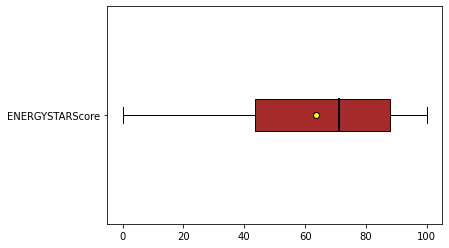

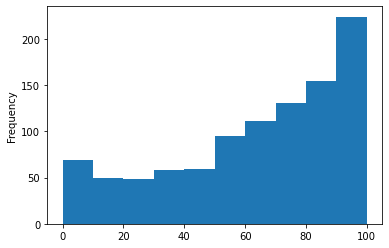

In [335]:
# Energy Star Score distribution (sur 1548 valeurs, 549 sont nan)

plt.boxplot([data.loc[data[energy_star_col].notna(), energy_star_col]], boxprops=dict(facecolor='brown'),
        medianprops = {'color':"black", "linewidth":2}, labels=[energy_star_col],
        meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'yellow'},
       showfliers=True, vert=False, showmeans=True, patch_artist=True)
plt.show()

# histogram
data.loc[data[energy_star_col].notna(), energy_star_col].plot(kind='hist')
plt.show()

Distribution de la variable : UsingSteam


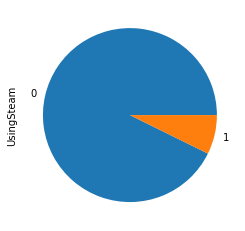

--------------------
Distribution de la variable : UsingElectricity


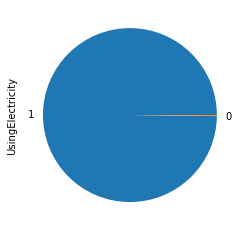

--------------------
Distribution de la variable : UsingGas


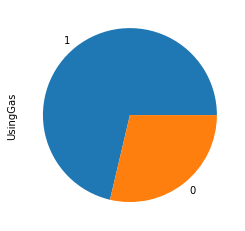

--------------------


In [336]:
for col in pie_cols:
    print("Distribution de la variable : " + col)
    
    # histogram
    data[col].value_counts().plot(kind='pie')
    plt.show()
    print("-"*20)

Distribution de la variable : ListOfAllPropertyUseTypes


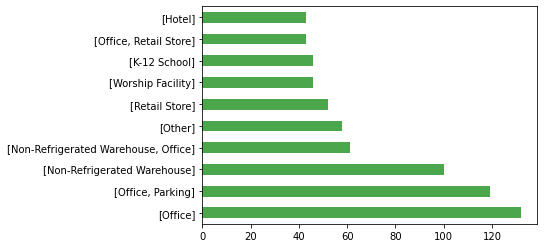

------------------------------
Distribution de la variable : ThirdLargestPropertyUseType


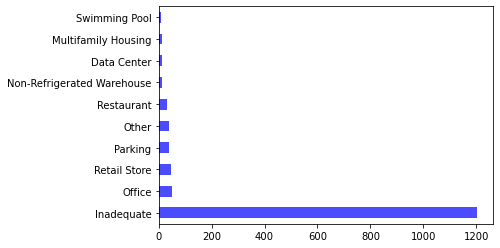

------------------------------
Distribution de la variable : PrimaryPropertyType


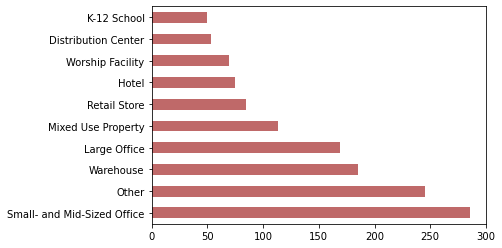

------------------------------
Distribution de la variable : SecondLargestPropertyUseType


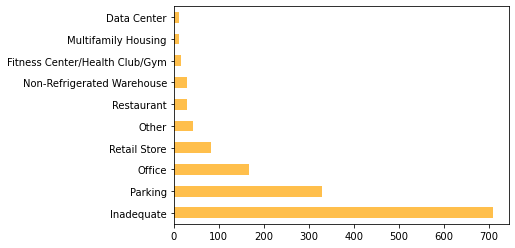

------------------------------
Distribution de la variable : BuildingType


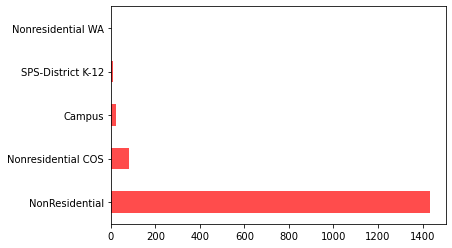

------------------------------
Distribution de la variable : LargestPropertyUseType


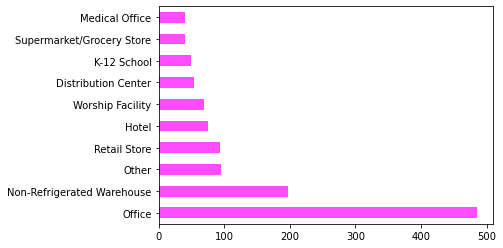

------------------------------


In [337]:
colors = ['green', 'blue', 'brown', 'orange', 'red', 'magenta']
for i, col in enumerate(quali_cols):
    print("Distribution de la variable : " + col)
    if len(data[col].value_counts()) < 10:
        data[col].value_counts().plot(kind='barh', color=colors[i], alpha=0.7)
    else:
        data[col].value_counts()[:10].plot(kind='barh', color=colors[i], alpha=0.7)
    plt.show()
    print('-'*30)

Distribution de la variable : YearBuilt


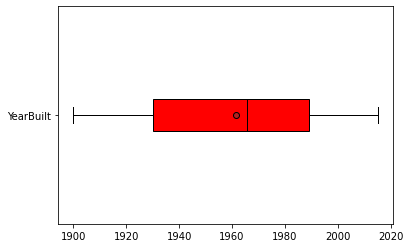

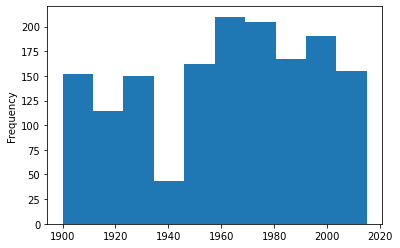

--------------------
Distribution de la variable : NumberofBuildings


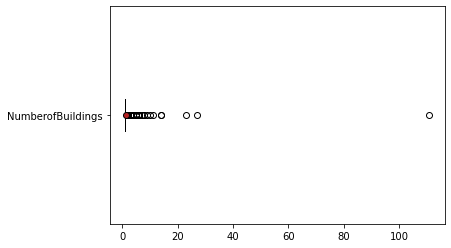

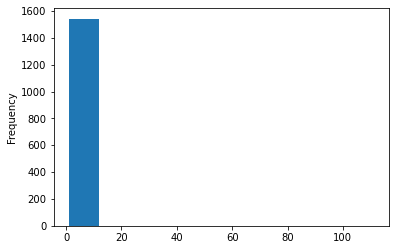

--------------------
Distribution de la variable : NumberofFloors


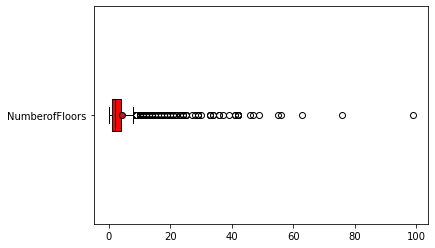

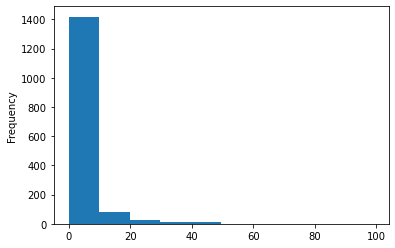

--------------------
Distribution de la variable : PropertyGFATotal


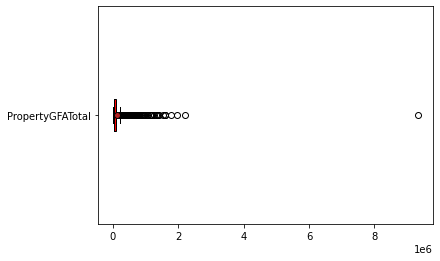

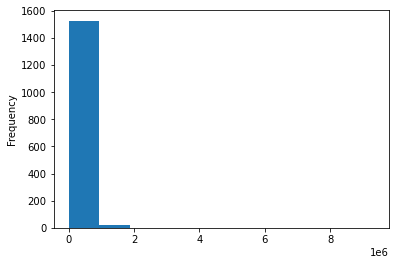

--------------------
Distribution de la variable : PropertyGFAParking


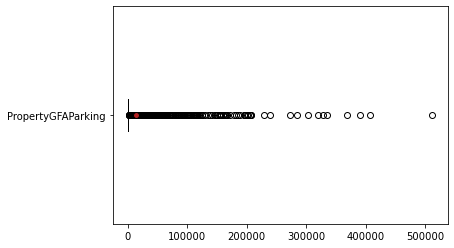

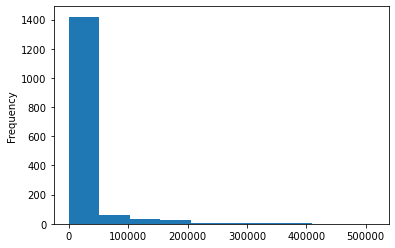

--------------------
Distribution de la variable : PropertyGFABuilding(s)


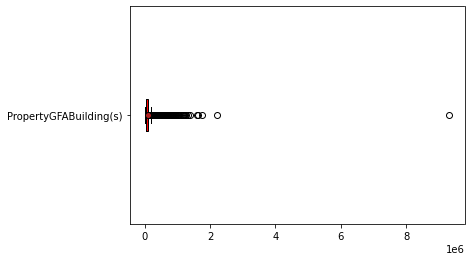

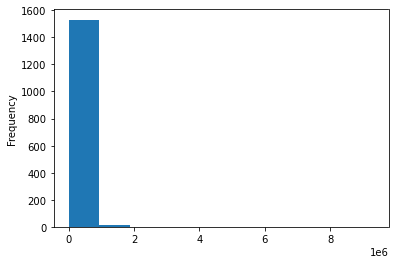

--------------------
Distribution de la variable : LargestPropertyUseTypeGFA


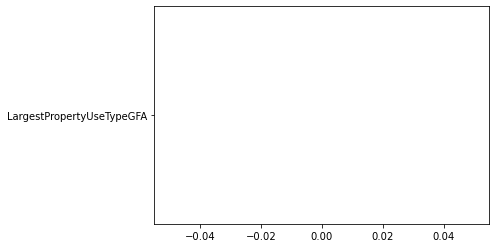

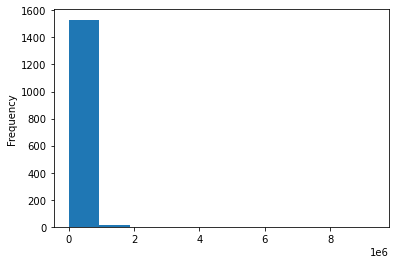

--------------------
Distribution de la variable : SecondLargestPropertyUseTypeGFA


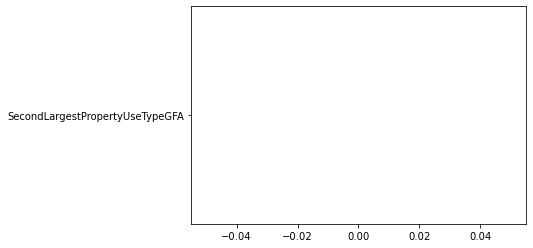

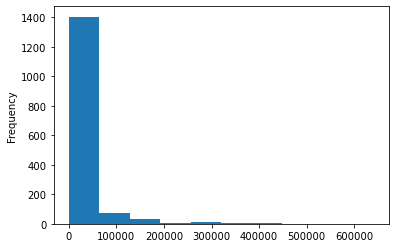

--------------------
Distribution de la variable : ThirdLargestPropertyUseTypeGFA


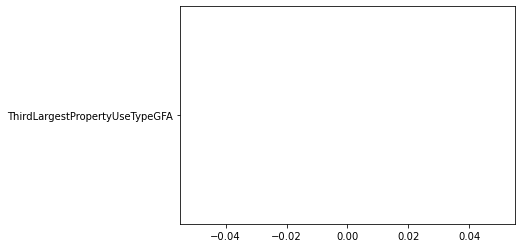

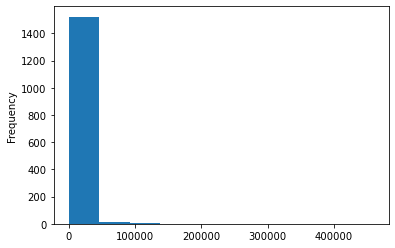

--------------------
Distribution de la variable : SiteEUI(kBtu/sf)


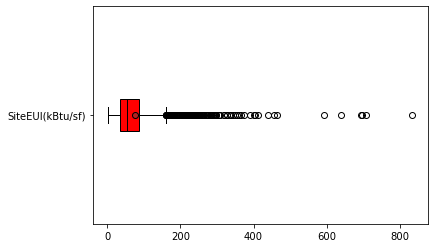

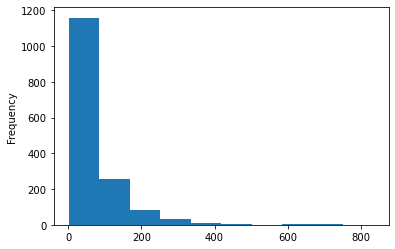

--------------------
Distribution de la variable : SourceEUI(kBtu/sf)


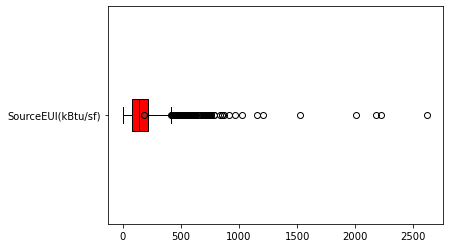

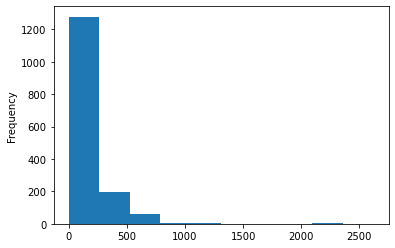

--------------------
Distribution de la variable : SiteEnergyUse(kBtu)


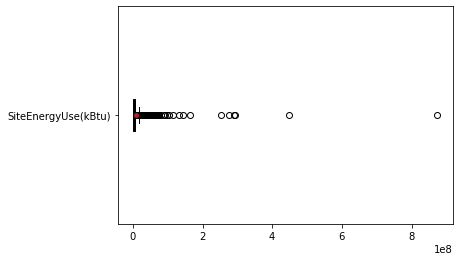

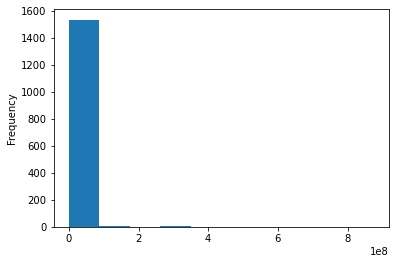

--------------------
Distribution de la variable : TotalGHGEmissions


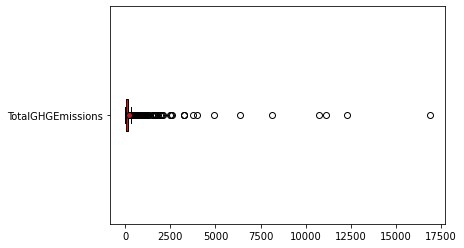

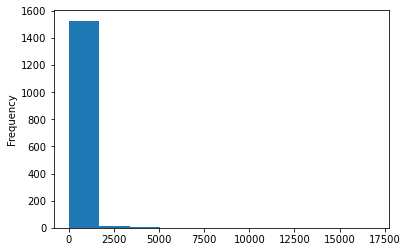

--------------------
Distribution de la variable : GHGEmissionsIntensity


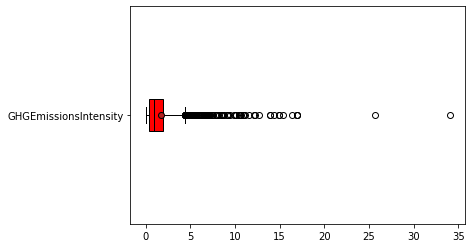

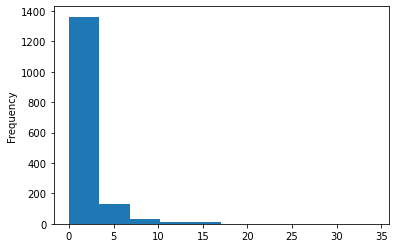

--------------------
Distribution de la variable : NumberOfUseTypes


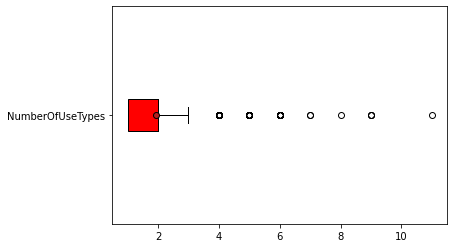

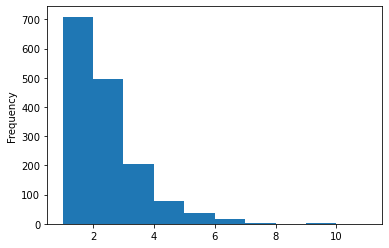

--------------------


In [338]:
for col in num_cols:
    print("Distribution de la variable : " + col)
    
    # boxplot
    plt.boxplot([data[col]], boxprops=dict(facecolor='red'), labels=[col], medianprops = {'color':"black"},
            meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'},
           showfliers=True, vert=False, showmeans=True, patch_artist=True)
    plt.show()
    
    # histogram
    data[col].plot(kind='hist')
    plt.show()
    print("-"*20)

Distribution de la variable : PropertyGFATotal


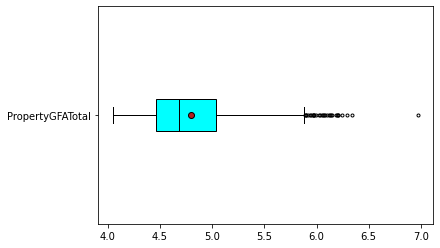

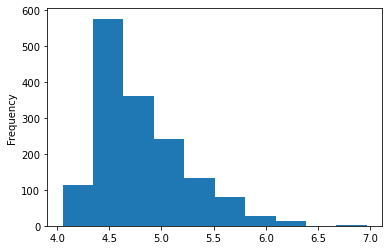

--------------------
Distribution de la variable : PropertyGFABuilding(s)


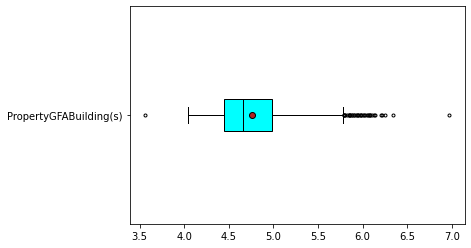

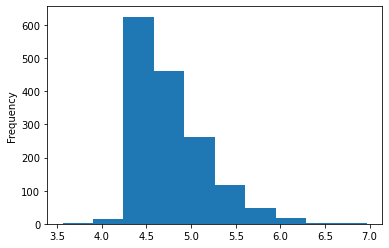

--------------------
Distribution de la variable : SiteEnergyUse(kBtu)


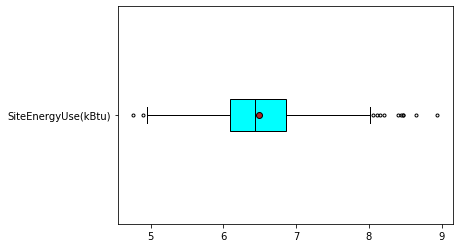

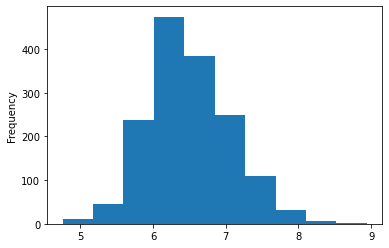

--------------------
Distribution de la variable : NumberofFloors


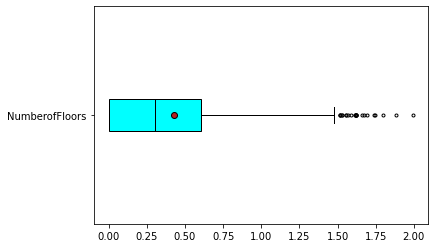

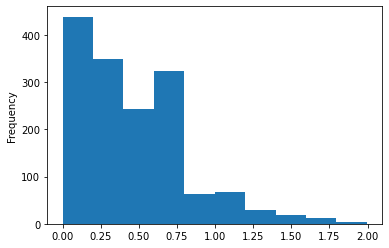

--------------------


In [339]:
# Utiliser un log10 pour plus de visibilité

for col in log_cols:
    print("Distribution de la variable : " + col)
    
    # boxplot en log10
    plt.boxplot([np.log10(data[col].replace(0,1))], boxprops=dict(facecolor='cyan'), labels=[col], medianprops = {'color':"black"},
            meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}, flierprops = {'marker':'.'},
           showfliers=True, vert=False, showmeans=True, patch_artist=True)
    plt.show()
    
    # histogram
    np.log10(data[col].replace(0,1)).plot(kind='hist')
    plt.show()
    print("-"*20)

Distribution de la variable : LargestPropertyUseTypeGFA


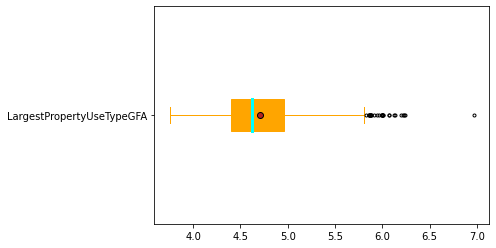

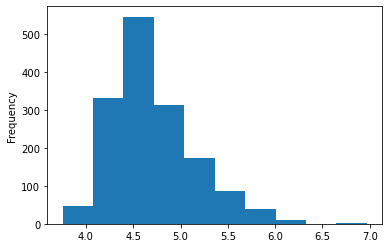

--------------------
Distribution de la variable : SecondLargestPropertyUseTypeGFA


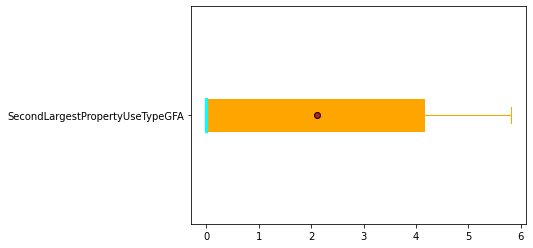

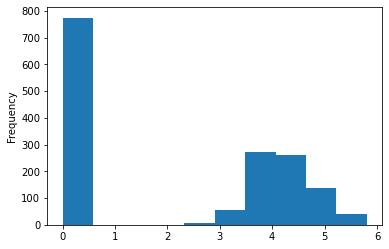

--------------------
Distribution de la variable : TotalGHGEmissions


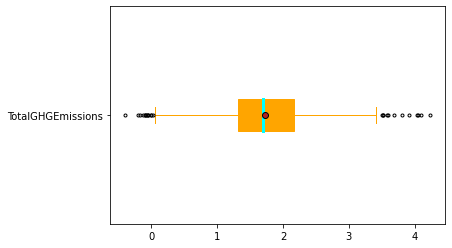

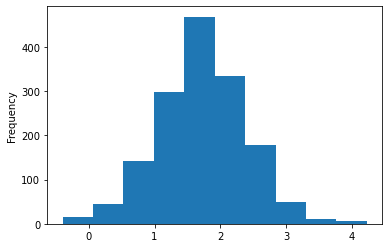

--------------------


In [340]:
for col in ["LargestPropertyUseTypeGFA", "SecondLargestPropertyUseTypeGFA", "TotalGHGEmissions"]:
    print("Distribution de la variable : " + col)
    
    # boxplot en log10
    np.log10(data[col].replace(0,1)).plot(kind="box", color="orange", vert=False, showmeans=True, flierprops = {'marker':'.'},
          labels=[col], medianprops = {'color':"cyan", 'linewidth':3}, patch_artist=True,
          meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'})
    plt.show()
    
    # histogram
    np.log10(data[col].replace(0,1)).plot(kind='hist')
    plt.show()
    print("-"*20)

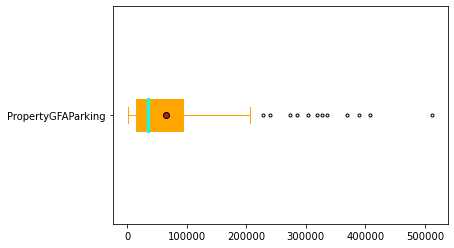

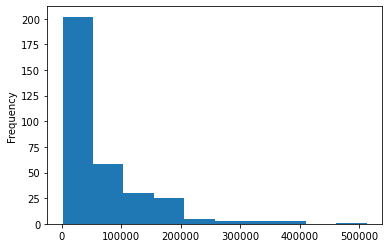

In [341]:
# Parking GFA where != 0

data.loc[data["PropertyGFAParking"] > 0, "PropertyGFAParking"].plot(kind="box",
                        color="orange", vert=False, showmeans=True, flierprops = {'marker':'.'},
                        labels=[col], medianprops = {'color':"cyan", 'linewidth':3}, patch_artist=True,
                        meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'})
plt.show()

data.loc[data["PropertyGFAParking"] > 0, "PropertyGFAParking"].plot(kind='hist')
plt.show()

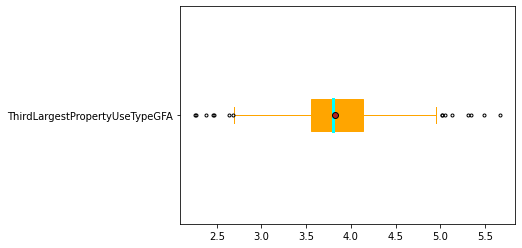

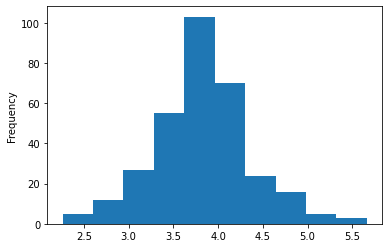

In [342]:
# ThirdLargestPropertyUseTypeGFA where != 0

np.log10(data.loc[data["ThirdLargestPropertyUseTypeGFA"] > 0, "ThirdLargestPropertyUseTypeGFA"]).plot(kind="box",
                        color="orange", vert=False, showmeans=True, flierprops = {'marker':'.'},
                        labels=[col], medianprops = {'color':"cyan", 'linewidth':3}, patch_artist=True,
                        meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'})
plt.show()

np.log10(data.loc[data["ThirdLargestPropertyUseTypeGFA"] > 0, "ThirdLargestPropertyUseTypeGFA"]).plot(kind='hist')
plt.show()

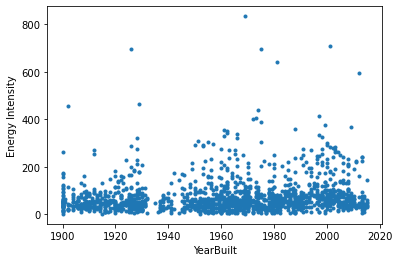

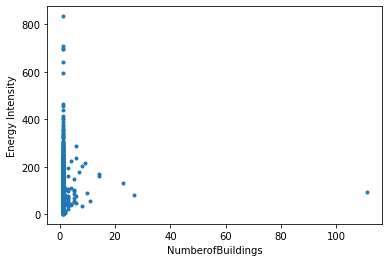

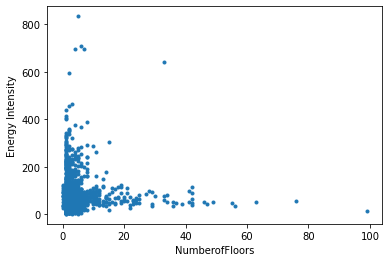

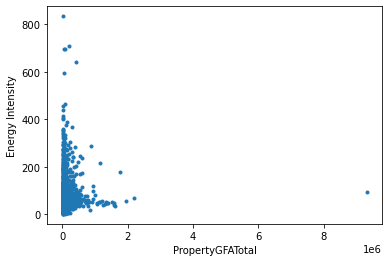

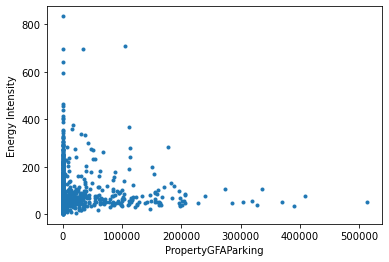

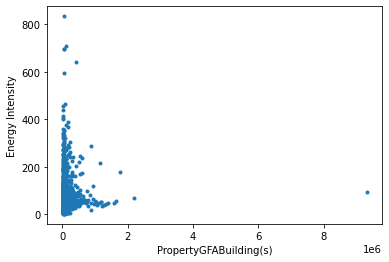

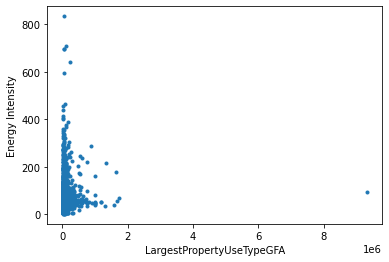

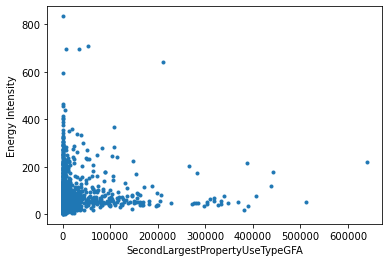

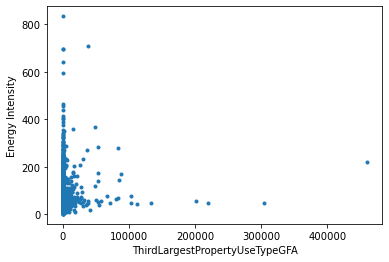

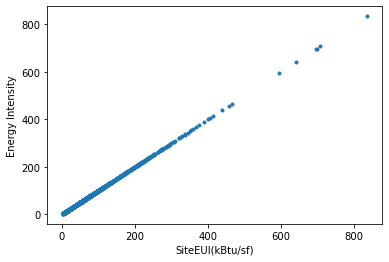

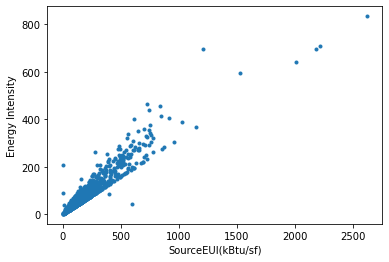

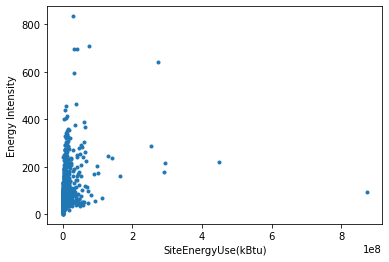

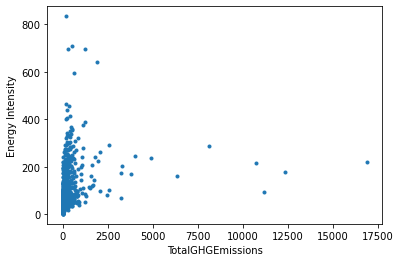

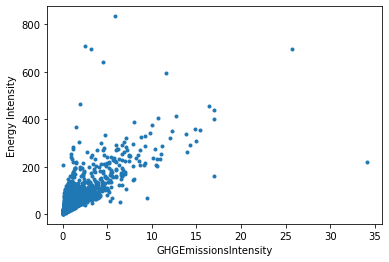

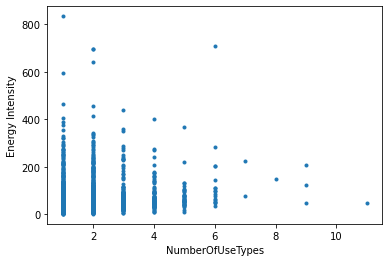

In [343]:
# SiteEUI(kBtu/sf) estimation intensité energétique

for col in num_cols:
    fig = plt.figure(1)
    plt.xlabel(col)
    plt.ylabel("Energy Intensity")
    plt.plot(data[col], data["SiteEUI(kBtu/sf)"], ".")
    plt.show()

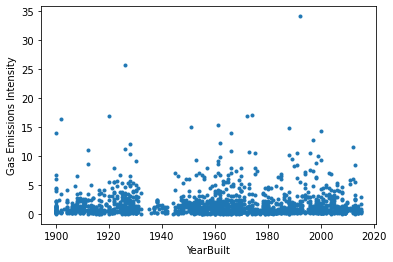

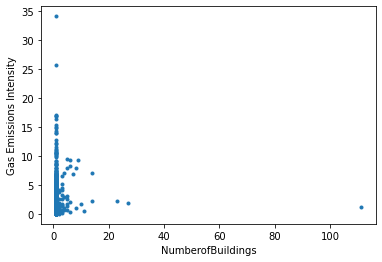

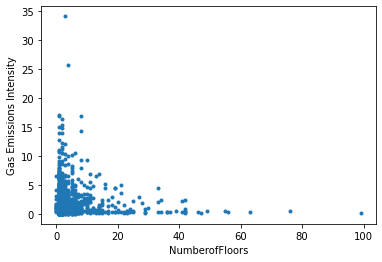

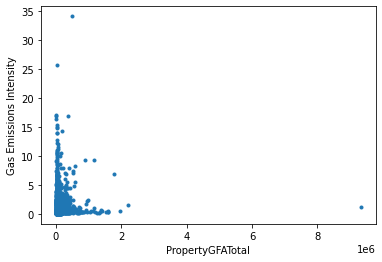

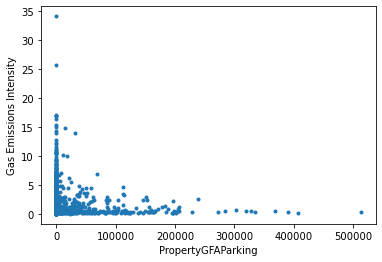

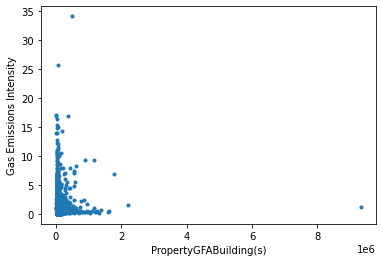

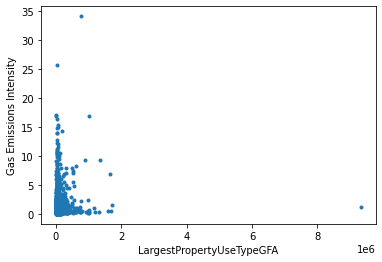

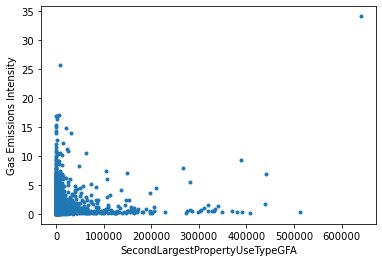

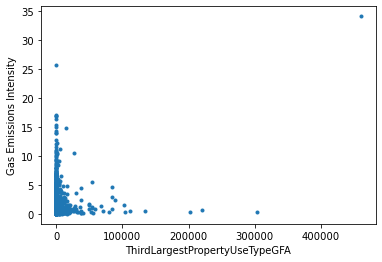

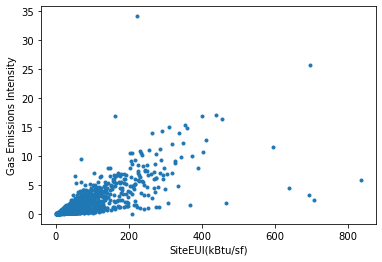

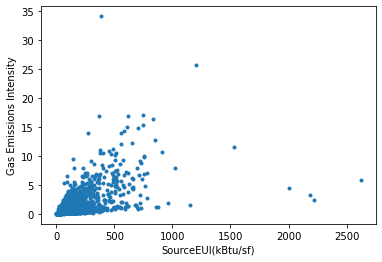

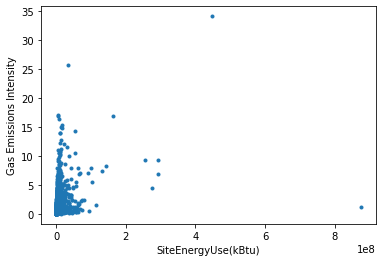

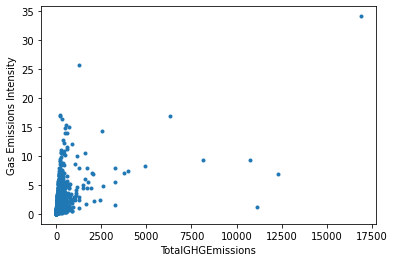

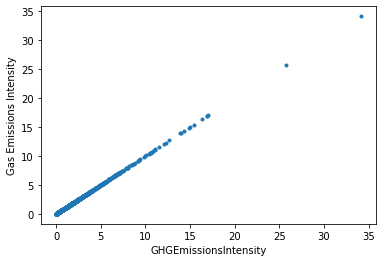

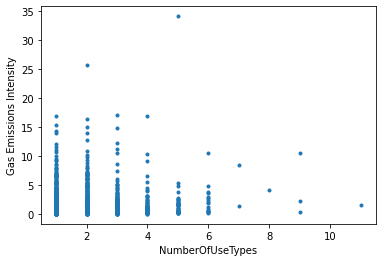

In [344]:
for col in num_cols:
    fig = plt.figure(1)
    plt.xlabel(col)
    plt.ylabel("Gas Emissions Intensity")
    plt.plot(data[col], data["GHGEmissionsIntensity"], ".")
    plt.show()

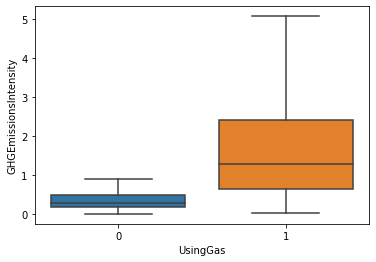

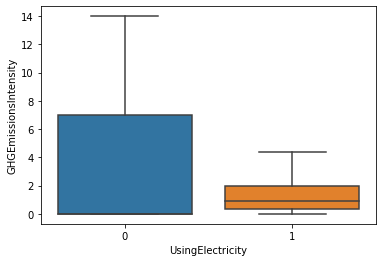

<AxesSubplot:xlabel='UsingSteam', ylabel='GHGEmissionsIntensity'>

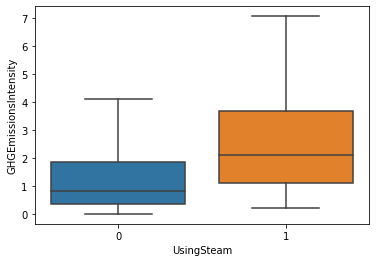

In [345]:
sns.boxplot(y='GHGEmissionsIntensity', x='UsingGas', data=data, orient='v', showfliers=False)
plt.show()
sns.boxplot(y='GHGEmissionsIntensity', x='UsingElectricity', data=data, orient='v', showfliers=False)
plt.show()
sns.boxplot(y='GHGEmissionsIntensity', x='UsingSteam', data=data, orient='v', showfliers=False)

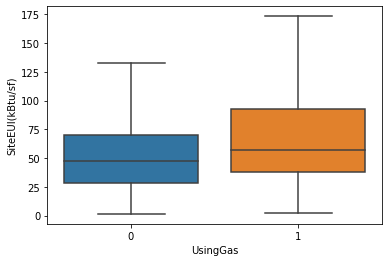

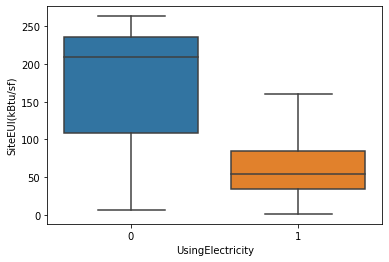

<AxesSubplot:xlabel='UsingSteam', ylabel='SiteEUI(kBtu/sf)'>

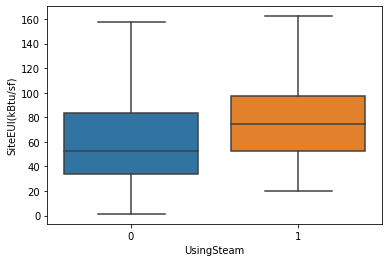

In [346]:
# Utiliser intensité pour comparer deux variables plutot que la conso en elle même

sns.boxplot(y='SiteEUI(kBtu/sf)', x='UsingGas', data=data, orient='v', showfliers=False)
plt.show()
sns.boxplot(y='SiteEUI(kBtu/sf)', x='UsingElectricity', data=data, orient='v', showfliers=False)
plt.show()
sns.boxplot(y='SiteEUI(kBtu/sf)', x='UsingSteam', data=data, orient='v', showfliers=False)

1055.9339595933354
11346.927178811158
8846.66351795577
3152.667794554949
1662.818171180702
217.99619312026806
783.9428010466414
359.13097340126086
1447.8359970267477
4361.637022082754
1636.1044082259543
1791.4655213052583
5174.000676317189
750.2943331495017
1190.6506988045614
187.81420926536094
7360.732038724154
26299.486508034715
4367.267871686128
13639.967993935026
2003.4448309890035
KruskalResult(statistic=535.4194997888776, pvalue=1.0943115684695802e-100)


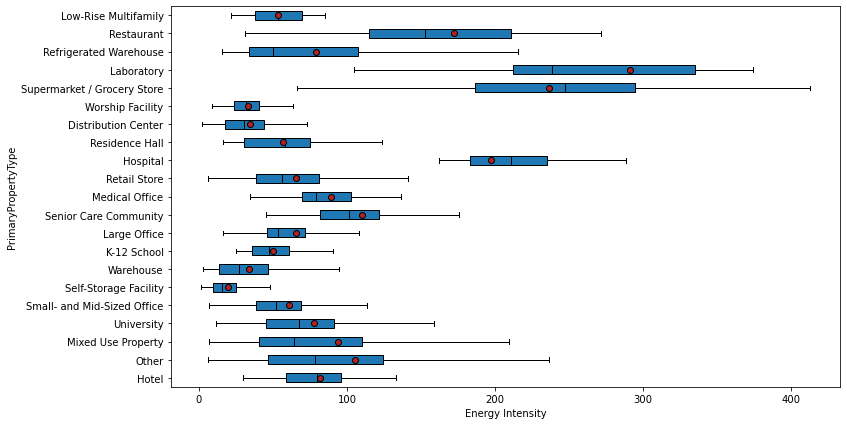

In [347]:
X = "PrimaryPropertyType" # qualitative
Y = "SiteEUI(kBtu/sf)" # quantitative

plt.figure(figsize=(12,7))
modalites = data[X].unique()
groups = []
for m in modalites:
    groups.append(data[data[X]==m][Y])
    print(statistics.variance(data[data[X]==m][Y]))

print(st.kruskal(*groups))
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groups, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Energy Intensity")
plt.ylabel("PrimaryPropertyType")
plt.show()
# au moins une des cat ne provient pas de la meme population que les autres

2.356077189189189
8.731617213114754
14.794501090391911
3.1315036231884057
1.1272773009446693
0.3859083333333333
0.9097977203290246
2.225870408163265
0.5119314877430262
10.1128
1.6271044534412955
2.4898443977591036
19.27161
1.3708661904761905
0.42094673439767777
0.62810179028133
9.384445128205128
53.39187666666667
2.0892992424242425
24.276533333333333
0.04499999999999998
KruskalResult(statistic=394.1291779312943, pvalue=3.3716540054763036e-71)


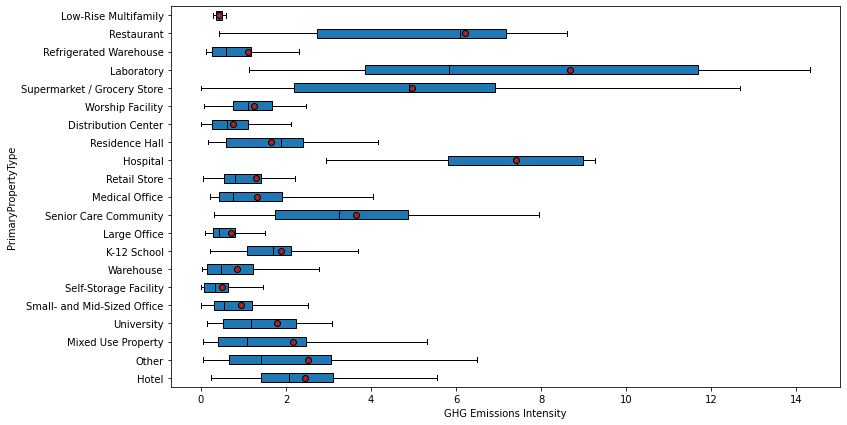

In [348]:
X = "PrimaryPropertyType" # qualitative
Y = "GHGEmissionsIntensity" # quantitative

plt.figure(figsize=(12,7))
modalites = data[X].unique()
groups = []
for m in modalites:
    groups.append(data[data[X]==m][Y])
    print(statistics.variance(data[data[X]==m][Y]))

print(st.kruskal(*groups))
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groups, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("GHG Emissions Intensity")
plt.ylabel("PrimaryPropertyType")
plt.show()
# au moins une des cat ne provient pas de la meme population que les autres

KruskalResult(statistic=239.1999077855844, pvalue=1.3795807641055747e-50)


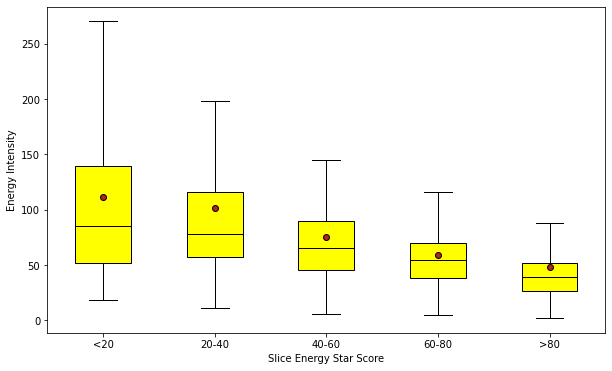

In [349]:
# Boxplot entre energy score et intensité energy

plt.figure(figsize=(10,6))
energy0 = data.loc[data["ENERGYSTARScore"] <= 20, "SiteEUI(kBtu/sf)"].values
energy1 = data.loc[data["ENERGYSTARScore"].isin(range(20,40)), "SiteEUI(kBtu/sf)"].values
energy2 = data.loc[data["ENERGYSTARScore"].isin(range(40,60)), "SiteEUI(kBtu/sf)"].values
energy3 = data.loc[data["ENERGYSTARScore"].isin(range(60,80)), "SiteEUI(kBtu/sf)"].values
energy4 = data.loc[data["ENERGYSTARScore"] >= 80, "SiteEUI(kBtu/sf)"].values


energy_slices = [energy0, energy1, energy2, energy3, energy4]
print(st.kruskal(*energy_slices))
plt.boxplot(energy_slices, boxprops=dict(facecolor='yellow'), labels=["<20", "20-40", "40-60", "60-80", ">80"], medianprops = {'color':"black"},
            meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'},
           showfliers=False, vert=True, showmeans=True, patch_artist=True)
plt.xlabel("Slice Energy Star Score")
plt.ylabel("Energy Intensity")
plt.show()

KruskalResult(statistic=102.41004057216787, pvalue=4.514078963555451e-24)


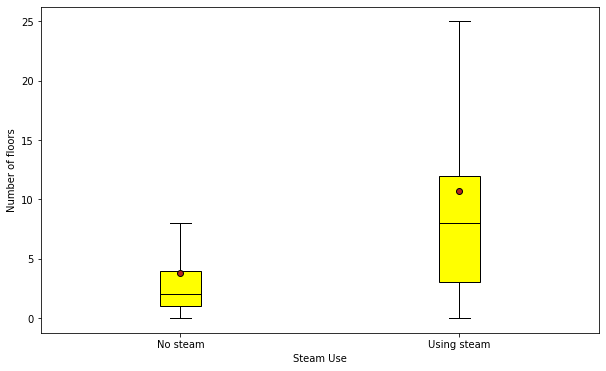

In [350]:
# Boxplot entre using steam et nb of floors

plt.figure(figsize=(10,6))
energy0 = data.loc[data["UsingSteam"] == 0, "NumberofFloors"].values
energy1 = data.loc[data["UsingSteam"] == 1, "NumberofFloors"].values


energy_slices = [energy0, energy1]
print(st.kruskal(*energy_slices))
plt.boxplot(energy_slices, boxprops=dict(facecolor='yellow'), labels=["No steam", "Using steam"], medianprops = {'color':"black"},
            meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'},
           showfliers=False, vert=True, showmeans=True, patch_artist=True)
plt.xlabel("Steam Use")
plt.ylabel("Number of floors")
plt.show()

<AxesSubplot:>

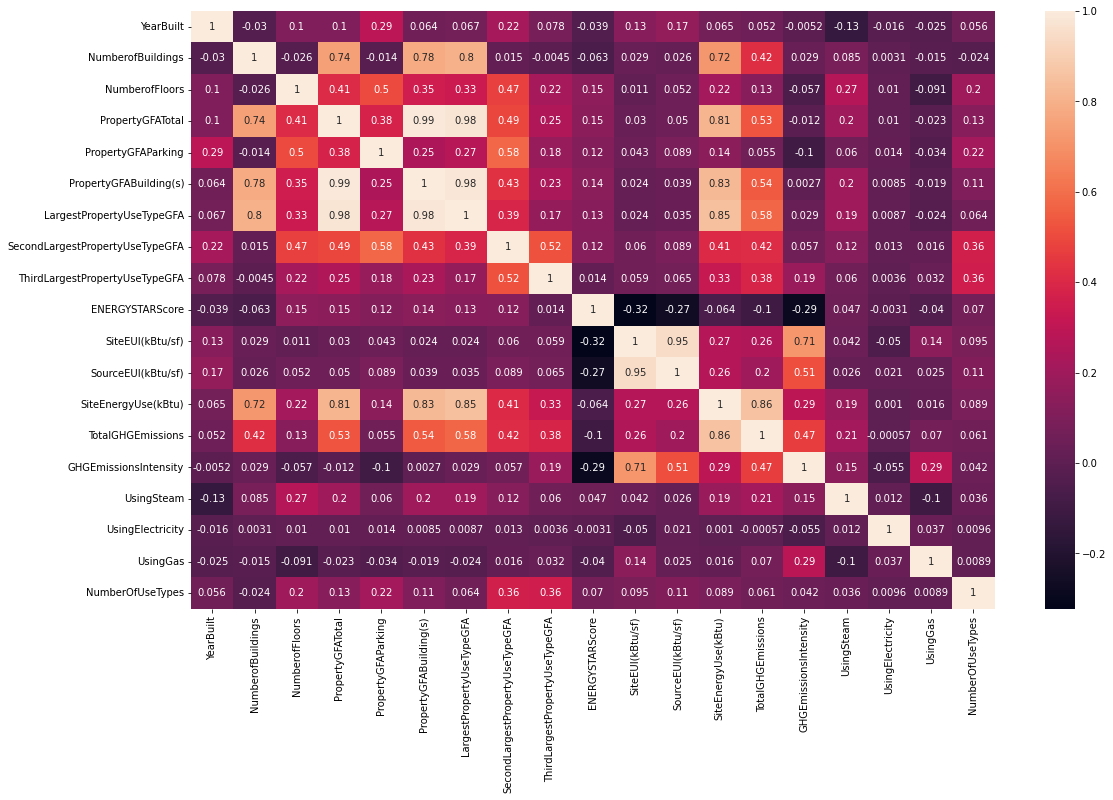

In [351]:
# Matrice de corrélation

plt.figure(figsize=(18,11))
cor = data.corr()
sns.heatmap(cor, annot=True) 

In [352]:
# Graphiquement et/ou avec tests statistiques, mettre en évidence les variables
# ayant de l'impact sur les variables cibles (conso/emissions)

# => les variables concernant la superficie(nombre de buildings, d'étages, surface au sol)
# => anti correlés à energy star score
# => type energy use

In [353]:
# Supprimer les colonnes non pertinentes pour les modèles / + trop de modalités / data leakage
data.drop(columns=[
    "ListOfAllPropertyUseTypes", "SourceEUI(kBtu/sf)", "GHGEmissionsIntensity", "SiteEUI(kBtu/sf)"
    ], inplace=True)

In [361]:
data.columns
data.shape

(1548, 21)

In [355]:
# Créer des datasets du plus simple au plus complexe, les exporter dans un second notebook

full_data_with_energy_score = data.loc[data["ENERGYSTARScore"].notna()]
full_data_with_energy_score = full_data_with_energy_score[~full_data_with_energy_score.isna().any(axis=1)]

simple_data = data.loc[:,["YearBuilt", "NumberofBuildings", "NumberofFloors", 
                          "PropertyGFATotal", "TotalGHGEmissions", "SiteEnergyUse(kBtu)"]]

large_simple_data = pd.concat([data.loc[:,["PrimaryPropertyType", "BuildingType"]],
                               simple_data], axis=1)

simple_cols = ["ENERGYSTARScore"] + list(simple_data.columns)

medium_data = pd.concat([data.loc[:,["UsingSteam", "UsingElectricity", "UsingGas", "NumberOfUseTypes"]],
                         simple_data], axis=1)

large_medium_data = pd.concat([data.loc[:,["UsingSteam", "UsingElectricity", "UsingGas", "NumberOfUseTypes"]],
                         large_simple_data], axis=1)

medium_cols = ["ENERGYSTARScore"] + list(medium_data.columns)

simple_data_with_energy_score = full_data_with_energy_score.loc[:,simple_cols]

medium_data_with_energy_score = full_data_with_energy_score.loc[:,medium_cols]

In [356]:
full_data_with_energy_score.to_excel('/home/kilian/CSV-Excels/full_data_with_energy_score.xlsx')
simple_data.to_excel('/home/kilian/CSV-Excels/simple_data.xlsx')
large_simple_data.to_excel('/home/kilian/CSV-Excels/large_simple_data.xlsx')
medium_data.to_excel('/home/kilian/CSV-Excels/medium_data.xlsx')
large_medium_data.to_excel('/home/kilian/CSV-Excels/large_medium_data.xlsx')
simple_data_with_energy_score.to_excel('/home/kilian/CSV-Excels/simple_data_with_energy_score.xlsx')
medium_data_with_energy_score.to_excel('/home/kilian/CSV-Excels/medium_data_with_energy_score.xlsx')